# Random Forest Classifier

## Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Read in the data

In [2]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,5.397605e-79,0.0,1.0,360.0,1.0,1.0,171.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,5.397605e-79,0.0,1.0,420.0,1.0,1.0,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,1.000000e+02,0.0,4.0,270.0,0.0,1.0,57.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,5.397605e-79,0.0,2.0,270.0,1.0,0.0,172.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,5.397605e-79,0.0,4.0,270.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


## Split the data into train/test sets (70/30 split)

In [3]:
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_DRNKWEK','_RFDRHV5','EXERANY2','_RFHLTH','EMPLOY1',
                  'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2['MENTHLTH2'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Fit the model

In [5]:
classifier = RandomForestClassifier(n_estimators=50, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
probs = classifier.predict_proba(X_test)
probs = probs[:,1]

## Print the accuracy reports and confusion matrix

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[81670 10620]
 [21487 21228]]
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84     92290
         1.0       0.67      0.50      0.57     42715

   micro avg       0.76      0.76      0.76    135005
   macro avg       0.73      0.69      0.70    135005
weighted avg       0.75      0.76      0.75    135005

0.7621791785489427


# Dealing with unbalanced data:

## The data is unbalanced, indicted by two things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows
### (2) The accuracy scores for the '1' values are far lower than the '0', showing the model is biased. It's good at predicting 'Good Mental Health', but not 'Poor Mental Health'.

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under-sampling' technique. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. I'll be re-running this with other re-sampling methods in the future for comparison.

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

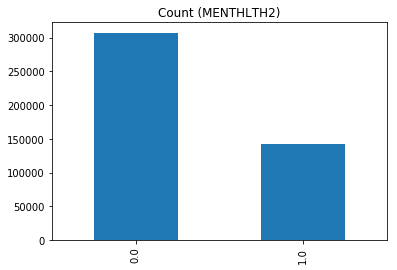

In [7]:
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

## First, re-check value counts for the target...you can see twice as many '0' values

In [8]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

## Now, we want to divide the target by value

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64


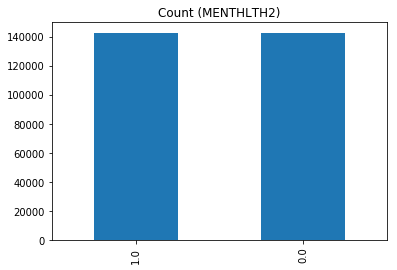

In [9]:
Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

## Let's re-run the model now

In [10]:
X = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_DRNKWEK','_RFDRHV5','EXERANY2','_RFHLTH','EMPLOY1',
                  'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2_under['MENTHLTH2'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)   #yields predicted class 0/1
probs = classifier.predict_proba(X_test)
probs = probs[:,1]    #yields probability of either class 0-1

In [13]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[32382 10323]
 [14631 28272]]
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72     42705
         1.0       0.73      0.66      0.69     42903

   micro avg       0.71      0.71      0.71     85608
   macro avg       0.71      0.71      0.71     85608
weighted avg       0.71      0.71      0.71     85608

0.7085085506027474


#### The accuracy score here is similar, but slightly better than the score for logistic regression (71% vs 70%). The score is lower than the previous RFC model using the unbalanced data, however, this model shows decent results for both classes.

### Confusion matrix shows that:
#### True positive:    32382     _(We predicted a positive result and it was positive)_
#### True negative:    28272     _(We predicted a negative result and it was negative)_
#### False positive:   10323      _(We predicted a positive result and it was negative)_
#### False negative:   14631     _(We predicted a negative result and it was positive)_

### So, this model makes more correct predictions, than not and the false negative rate seems a bit higher than the false positive

## Now, let's run a ROC plot and get the area under the curve score (AUC)

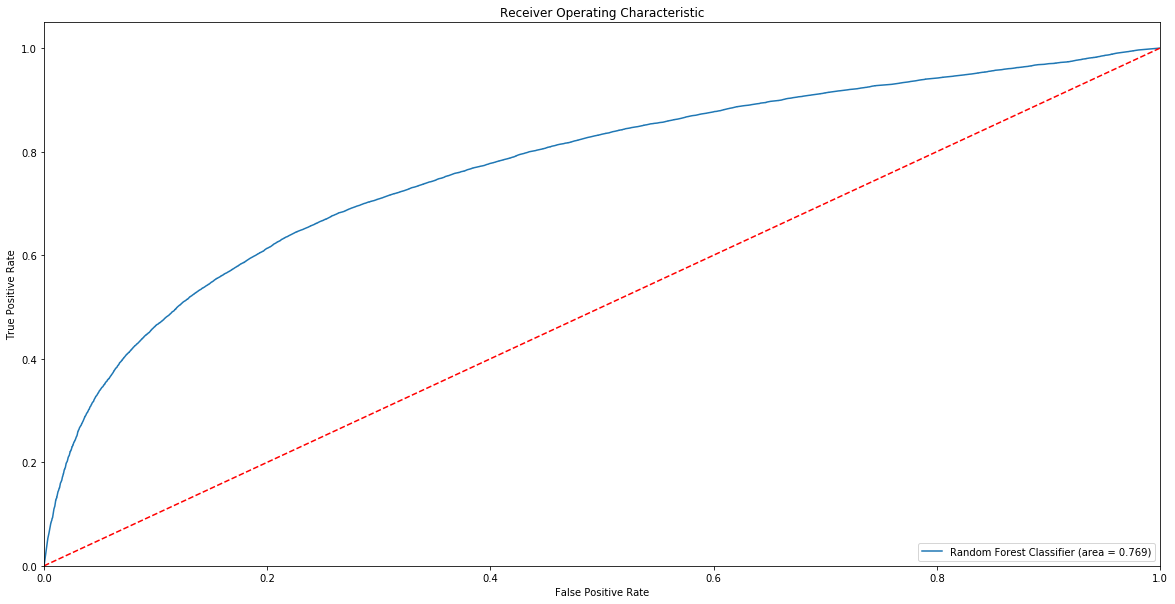

AUC: 0.769


In [14]:
roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('AUC: %.3f' % roc_auc)

#### ROC for both the Random Forest Classifier and Logistic Regression were very similar. Both had Area Under the Curve (AUC) at .77. 